In [6]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import numpy as np
import rioxarray as rxr
import xarray as xr
from numpy import *

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import sklearn

from yellowbrick.cluster import KElbowVisualizer

In [74]:
mosaics_path = os.path.join(et.io.HOME, 
                             'desktop', 
                             'earth-analytics', 
                             'python', 
                             'watersheds-biodiversity', 
                             'mosaics')

mosaics = glob(os.path.join(str(mosaics_path), "*.tif"))




In [108]:
mosaic_1 = rxr.open_rasterio(mosaics[5],
                                 masked=True, 
                                 parse_coordinates=False)
    
mosaic_2 = rxr.open_rasterio(mosaics[6],
                                 masked=True, 
                                 parse_coordinates=False)

In [109]:
mosaic_2.max()

/Users/merielle/opt/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rioxarray/_io.py:200: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  out = riods.read(band_key, window=window, masked=self.masked)


<xarray.DataArray ()>
array(462.99963379)
Coordinates:
    spatial_ref  int64 0

In [81]:
mosaic_1.max()

/Users/merielle/opt/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rioxarray/_io.py:200: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  out = riods.read(band_key, window=window, masked=self.masked)


<xarray.DataArray ()>
array(549.99987793)
Coordinates:
    spatial_ref  int64 0

In [115]:


my_stack = []
for mosaic, i in zip(mosaics, range(len(mosaics))):
    mosaic_i = rxr.open_rasterio(mosaics[i],
                                 masked=True, 
                                 parse_coordinates=False)
    my_stack.append(mosaic_i)


    


In [11]:
# Create output directory and the output path

output_dir = os.path.join(et.io.HOME, 
                             'desktop', 
                             'earth-analytics', 
                             'python', 
                             'watersheds-biodiversity', 
                             'chemical-stack')
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

stack_out_path = os.path.join(output_dir, "mosaic-stack.tiff")


In [13]:
mosaic_1_stacked_tiff = rxr.open_rasterio(stack_dir,
                                 masked=True, 
                                 parse_coordinates=False)

mosaic_1_stacked_tiff.shape

(56, 8080, 4927)

In [ ]:
mosaic_stack_array, raster_prof = es.stack(mosaics, out_path=stack_out_path)

In [122]:
mosaic_stack = mosaic_stack_array[bands,:,:]

print('single raster value: ', mosaic_1[0,4000,2500])

print('stack raster value: ', mosaic_1_stacked_tiff[5,4000,2500])



single raster value:  <xarray.DataArray ()>
array(243.38327)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref
stack raster value:  <xarray.DataArray ()>
array(255.)
Coordinates:
    band         int64 6
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref


/Users/merielle/opt/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rioxarray/_io.py:200: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  out = riods.read(band_key, window=window, masked=self.masked)


In [38]:
extent = plotting_extent(mosaic_1[0], raster_prof["transform"])

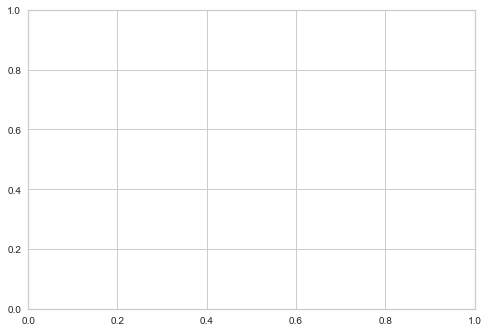

In [28]:
def plot_array(array,spatial_extent,colorlimit,ax=plt.gca(),title='',cmap_title='',colormap=''):
    plot = plt.imshow(array,extent=spatial_extent,clim=colorlimit); 
    cbar = plt.colorbar(plot,aspect=40); plt.set_cmap(colormap); 
    cbar.set_label(cmap_title,rotation=90,labelpad=20);
    plt.title(title); ax = plt.gca(); 
    ax.ticklabel_format(useOffset=False, style='plain'); 
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90);

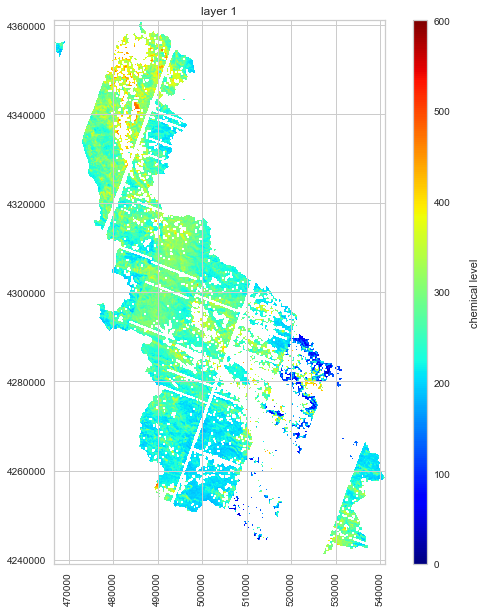

In [82]:
fig, ax = plt.subplots(figsize=(10,10))


plot_array(mosaic_1[0,:,:],
           extent,
           (0,600),
           title='layer 1',
           cmap_title='chemical level',
           colormap='jet')

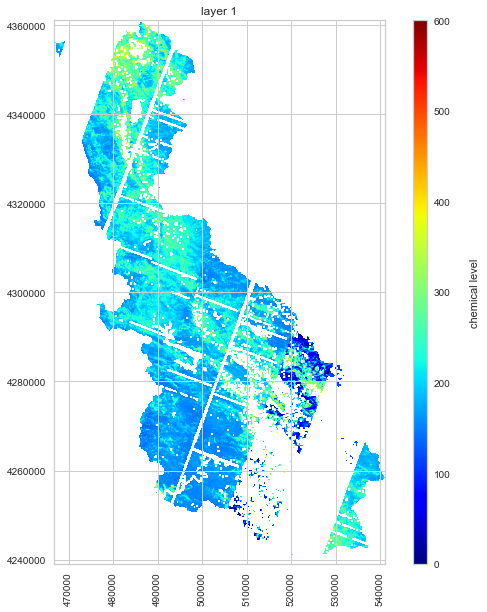

In [110]:
fig, ax = plt.subplots(figsize=(10,10))


plot_array(mosaic_2[0,:,:],
           extent,
           (0,600),
           title='layer 1',
           cmap_title='chemical level',
           colormap='jet')

In [20]:
#model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
#                           assign_labels='kmeans')
#labels = model.fit_predict(layer3)

In [43]:
mosaic_1.shape

(4, 8080, 4927)

In [118]:
es._stack_bands(my_stack)

AttributeError: The sources object should be Dataset Reader

In [97]:
where_are_NaNs = isnan(layer)
layer[where_are_NaNs] = 0

In [105]:
mosaic_1_np = mosaic_1[0,:,:].values

In [111]:
mosaic_2_np = mosaic_2[0,:,:].values

In [101]:
where_are_NaNs = isnan(mosaic_1_np)
mosaic_1_np[where_are_NaNs] = 0

In [112]:
where_are_NaNs = isnan(mosaic_2_np)
mosaic_2_np[where_are_NaNs] = 0

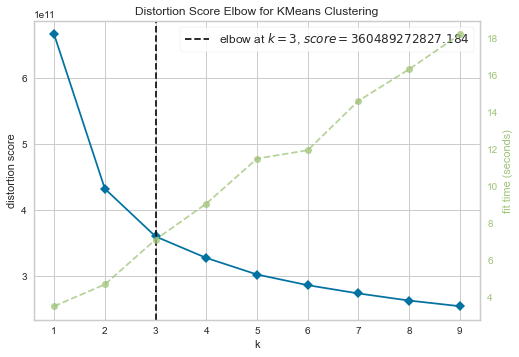

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:


# instantiate K-means model
model = KMeans()
   
# create visulization for Elbow Method
elbow = KElbowVisualizer(model, k=(1,10))
elbow.fit(mosaic_1_np)
elbow.show()

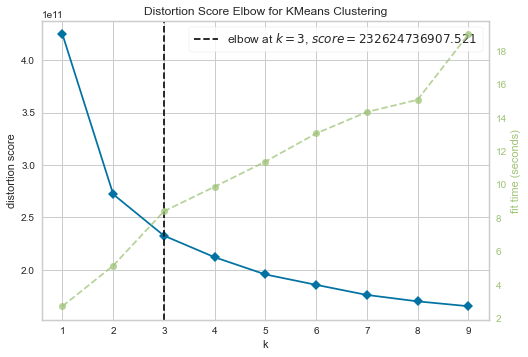

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
# instantiate K-means model
model = KMeans()

# create visulization for Elbow Method
elbow = KElbowVisualizer(model, k=(1,10))
elbow.fit(mosaic_2_np)
elbow.show()

In [106]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(mosaic_1_np)
    

In [107]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)